# Projet Long : Julia VS Python VS R

#### Audrey Fortuné M2BI

<div class="alert alert-block alert-success">
    Run cells in Python 3.8.3
</div>

Nous allons mesurer le temps d'exécuter du programme.

In [1]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
import time
from datetime import timedelta
start_time = time.monotonic()
########### ~~~~~~~~~~~~~~~~~~~~~###########

.

## 1) Lire un fichier .pdb

Nous allons prendre comme fichier d'exemple, la structure disponible sur la Protein Data Bank '1RGB' qui est une phospholipase A2 de *Vipera ammodytes meridionali*.

Nous utilisons le module 'Biopython' qui utilise la hiérarchie suivante : structure > model > chain > residue > atom.

In [2]:
# import des packages

import Bio
from Bio.PDB import PDBParser

In [3]:
# Lecture du fichier

prot_id, prot_file = "1rgb", "data/1rgb.pdb"
structure = PDBParser().get_structure(prot_id, prot_file)

/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4442.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 4462.
  warnings.warn(


In [4]:
# Protein Structure

def prot_struc(structure, fichier):
    """
    To get the proteine structure.
    
        Parameters
        ----------
        struture : PDBParser.get_structure
        fichier : file name of PDB file
    
        Returns
        -------
        tmp : The protein structure of the input file with the number of model, chains, residues and atoms.
        
    """
    compt_chain = 0
    compt_residu = 0
    compt_atom = 0
    for model in structure:   # X-Ray generally only have 1 model, while more in NMR
        for chain in model: 
            compt_chain += 1
            for residue in chain:
                compt_residu += 1
                for atom in residue:
                    compt_atom +=1
    with open(prot_file, "r") as pdb_file:
        res_count = 0
        for line in pdb_file:
            if line.startswith("DBREF"):
                chain = line[12:13].strip()
                model = line[17:18].strip()
                residu = line[21:24].strip()
        tuple = "Protein Structure", fichier[5:], "with", str(model), "models,", str(compt_chain), "chains,", \
                str(compt_residu), "residues,", str(compt_atom), "atoms."
        tmp = " ".join(tuple)
    return(tmp) 

In [5]:
prot_struc(structure, prot_file)

'Protein Structure 1rgb.pdb with 1 models, 4 chains, 490 residues, 3892 atoms.'

In [6]:
# Header Information

for key, value in structure.header.items():
    print(key, ":", value)

name : phospholipase a2 from vipera ammodytes meridionalis
head : hydrolase
idcode : 1RGB
deposition_date : 2003-11-12
release_date : 2005-01-18
structure_method : x-ray diffraction
resolution : 3.3
structure_reference : []
journal_reference : d.n.georgieva,w.rypniewski,a.gabdoulkhakov,n.genov,c.asp49 phospholipase a(2)-elaidoylamide complex: a newof inhibition. biochem.biophys.res.commun. v. 319 1314 2004 issn 0006-291x 15194511 10.1016/j.bbrc.2004.05.106 
author : D.N.Georgieva
compound : {'1': {'misc': '', 'molecule': 'phospholipase a2', 'chain': 'a, b, k, l', 'synonym': 'phosphatidylcholine 2-acylhydrolase, vipoxin non-toxiccomponent, vipoxin b chain ', 'ec_number': '3.1.1.4', 'ec': '3.1.1.4'}}
source : {'1': {'misc': '', 'organism_scientific': 'vipera ammodytes meridionalis', 'organism_taxid': '73841', 'strain': 'meridionalis', 'secretion': 'venom'}}
has_missing_residues : False
missing_residues : []
keywords : phospholipase a2, neurotoxin, elaidoylamide, hydrolase
journal : AUTH 

> Affichons les coordonnées des carbones α (notés CA) des 10 premiers résidus:

In [7]:
res_start = 1
model = structure[0]
chain = model["A"]
for i in range(10):
    idx = res_start + i
    print("Residue", idx, "with name", chain[idx].resname, "coordinates", chain[idx]["CA"].coord)

Residue 1 with name ASN coordinates [ 4.682 55.345 28.346]
Residue 2 with name LEU coordinates [ 5.148 56.953 25.006]
Residue 3 with name PHE coordinates [ 4.657 53.617 23.371]
Residue 4 with name GLN coordinates [ 1.52  52.812 25.326]
Residue 5 with name PHE coordinates [ 0.559 56.349 24.578]
Residue 6 with name ALA coordinates [ 1.554 56.075 20.967]
Residue 7 with name LYS coordinates [-0.772 53.147 20.427]
Residue 8 with name MET coordinates [-3.666 55.052 21.963]
Residue 9 with name ILE coordinates [-3.329 57.765 19.393]
Residue 10 with name ASN coordinates [-3.162 55.165 16.617]


.

## 2) Visualisation de la structure

Les lignes de codes qui suivent semblent fonctionner sous Windows mais pas sur Mac (l'erreur est courante sous Mac).

Ces lignes permettent de faire appel au logiciel **PyMOL** et affiche la structure dans le jupyter notebook. 

Nous pouvons également afficher la structure directement dans le logiciel **PyMOL**.

Ces lignes de commandes sont à rentrer dans le logiciel PyMOL :

Nous pouvons également afficher la structure dans la celulle de Jupyter notebook grâce à la nouvelle bibliothèque **py3Dmol**. 
Pour cela, il faut exécuter le script en local pour voir la structure protéique et pouvoir la faire pivoter. 

In [8]:
import py3Dmol

In [9]:
# Visualisation en cartoon

p_cartoon = py3Dmol.view(query = 'pdb:1RGB')
p_cartoon.setStyle({'cartoon': {'color':'spectrum'}})
p_cartoon.show() # exécuter en local

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
# Visualisation en sphere

p_sphere = py3Dmol.view(query = 'pdb:1RGB')
p_sphere.setStyle({'sphere': {'color':'spectrum'}})
p_sphere.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

.

## 3) Carte de contact

In [11]:
# import des packages

import pandas as pd
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
# Fonction pour récupérer les coordonnées des atomes d'un fichier .pdb

def trajectoirePDB(pdb_file):
    '''
    Reads a trajectory PDB file and returns a dictionnary of pandas dataframes.

        Parameters
        ---------
        pdb_file (string) : name of pdb file

        Returns
        -------
        dictionnary of pandas dataframes with col index : position, x, y, z
    '''
    row = []
    dico_coord = {}
    with open(pdb_file, "r") as file_in:
        flag = False
        position = 0
        chaine = str(1)
        for line in file_in:
            if line.startswith("TER"):
                dico_coord = pd.DataFrame(row, columns = ["residue", "chaine", "position", "x", "y", "z"])
            if line.startswith("ATOM") and line[12:16].strip() == "CA":            
                if position != int(line[22:26].strip()) + 1 and flag == True:
                    for i in range(position, int(line[22:26].strip()) -1):
                        row.append(("-",str(line[21:22].strip()),i, 0, 0, 0))
                try:
                    flag = True
                    residue = str(line[17:20].strip())
                    chaine = str(line[21:22].strip())
                    position = int(line[22:26].strip())
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    row.append((residue,chaine,position, x, y, z))
                except ValueError:
                    sys.exit()
    file_in.close()
    return dico_coord

In [13]:
# Fonction pour calculer les distances entre deux coordonnées

def distance(coord1, coord2):
    """
    Calculate the squared distance of the alpha carbons.
    
        Parameters
        ----------
        coord1, coord2 : atom coordinates
        
        Returns
        -------
        results rounding the number to three digits after the decimal point
    
    """
    dist = (coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2 + (coord1[2] - coord2[2])**2
    return(round(math.sqrt(dist),3))


# Fonction pour créer une matrice de distances

def Creation_matrice(dico):
    """
    Create of the distance matrix.
    
         Parameters
         ----------
         dico : return of trajectoirePDB function
         
         Returns
         -------
         A : distance matrix
    """
    A = np.eye(dico.shape[0],dico.shape[0]) # numpy.eye : renvoie un tableau 2-D avec des 1 comme diagonale et des 0 ailleurs.
    for i in range(0, dico.shape[0]):
        array_coors_CA1 = dico[["x", "y", "z"]].to_numpy()[i]
        for j in range(0,dico.shape[0]):
            array_coors_CA2 = dico[["x", "y", "z"]].to_numpy()[j]
            if dico["residue"][i] == "-" or dico["residue"][j] == "-":
                A[i,j] = -1
            else:
                A[i,j] = distance(list(array_coors_CA1), list(array_coors_CA2)) # fait appelle à fonction distance
    return(A)

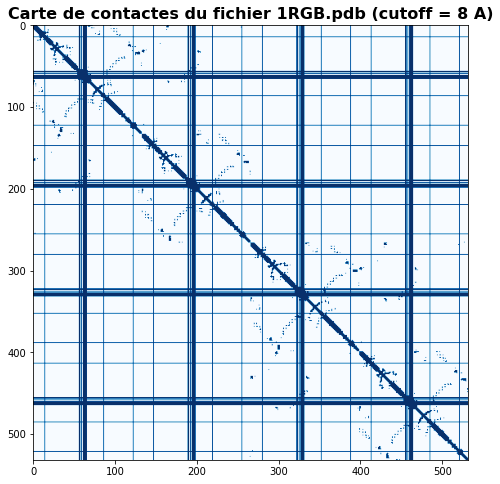

In [14]:
contacts = trajectoirePDB("data/1rgb.pdb")

cutoff = 8.0 # On choisi un cutoff < 8 Angström
matrice_distance = Creation_matrice(contacts) < cutoff

plt.figure(figsize = (8, 8)) 
plt.imshow(matrice_distance, cmap = plt.get_cmap("Blues")) # Plot a matrix or an array as an image.
plt.title('Carte de contactes du fichier 1RGB.pdb (cutoff = 8 A)', fontsize = 16, fontweight = "bold") 
plt.show()

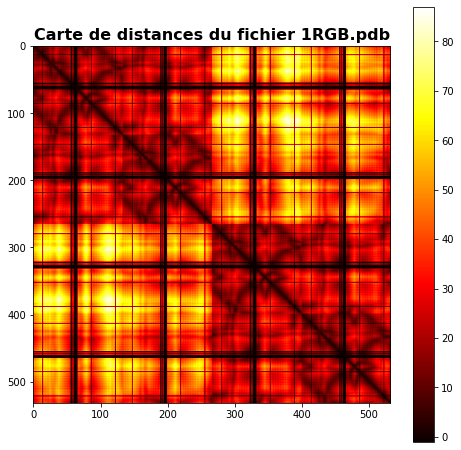

In [15]:
# pas de cutoff
matrice_distance = Creation_matrice(contacts) 

plt.figure(figsize = (8, 8)) 
plt.imshow(matrice_distance, cmap = plt.get_cmap("hot")) # Plot a matrix or an array as an image.
plt.colorbar()
plt.title('Carte de distances du fichier 1RGB.pdb', fontsize = 16, fontweight = "bold") 
plt.show()

.

## 4) Comparer 2 séquences

Nous allons prendre comme exemple ici deux fichiers issues de la Protein Data Bank : 6HQ1 et 1UHM qui sont respectivement des domaines globulaires de l'histone H1 humaine, et de l'homologue d'histone de liaison Hho1p de *S. cerevisiae*. 

In [16]:
# import des packages

from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder

In [17]:
# Protein Sequence

def seq_prot(structure):
    """
    Reading a pdb file and extracting protein sequence.
        Parameters
        ----------
        structure : PDBParser().get_structure(prot_id, prot_file)
        
        Returns
        -------
        sequence : protein sequence
    """
    print("La séquence protéique du fichier {}.pdb est :".format(prot_id))
    sequence = []
    ppb = PPBuilder() # Using C-N
    for pp in ppb.build_peptides(structure[0]["A"]):
        tmp = pp.get_sequence()
        sequence.append(tmp)
    sq = ""
    for element in sequence:
        sq = sq + element
    return(sq) 

In [18]:
# domaine globulaire de l'histone humaine H1.0

prot_id, prot_file = "1UST", "data/6HQ1.pdb"
struc1 = PDBParser().get_structure(prot_id, prot_file)

seq1 = seq_prot(struc1)
print(seq1)

La séquence protéique du fichier 1UST.pdb est :
GDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAK


In [19]:
# domaine globulaire de l'homologue d'histone de liaison Hho1p de S. cerevisiae

prot_id, prot_file = "1USS", "data/1UHM.pdb"
struc2 = PDBParser().get_structure(prot_id, prot_file)

seq2 = seq_prot(struc2)
print(seq2)

La séquence protéique du fichier 1USS.pdb est :
EASSKSYRELIIEGLTALKERKGSSRPALKKFIKENYPIVGSASNFDLYFNNAIKKGVEAGDFEQPKGPAGAVKLAKK


### * Matrice de score Blosum62

In [20]:
# import des packages
import Bio
from Bio import pairwise2
from Bio.Align import substitution_matrices
import pandas as pd

In [21]:
blosum62 = substitution_matrices.load("BLOSUM62")

matrice_blosum = blosum62
header = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X','*']
scoremodel = pd.DataFrame(columns = header, index = header, data = matrice_blosum)
scoremodel
# Une matrice de substitution est une fonction du score de substitution (ou du coût) d'un symbole à l'autre. 

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4.0,-1.0,-2.0,-2.0,0.0,-1.0,-1.0,0.0,-2.0,-1.0,...,-1.0,1.0,0.0,-3.0,-2.0,0.0,-2.0,-1.0,0.0,-4.0
R,-1.0,5.0,0.0,-2.0,-3.0,1.0,0.0,-2.0,0.0,-3.0,...,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0,-1.0,0.0,-1.0,-4.0
N,-2.0,0.0,6.0,1.0,-3.0,0.0,0.0,0.0,1.0,-3.0,...,-2.0,1.0,0.0,-4.0,-2.0,-3.0,3.0,0.0,-1.0,-4.0
D,-2.0,-2.0,1.0,6.0,-3.0,0.0,2.0,-1.0,-1.0,-3.0,...,-1.0,0.0,-1.0,-4.0,-3.0,-3.0,4.0,1.0,-1.0,-4.0
C,0.0,-3.0,-3.0,-3.0,9.0,-3.0,-4.0,-3.0,-3.0,-1.0,...,-3.0,-1.0,-1.0,-2.0,-2.0,-1.0,-3.0,-3.0,-2.0,-4.0
Q,-1.0,1.0,0.0,0.0,-3.0,5.0,2.0,-2.0,0.0,-3.0,...,-1.0,0.0,-1.0,-2.0,-1.0,-2.0,0.0,3.0,-1.0,-4.0
E,-1.0,0.0,0.0,2.0,-4.0,2.0,5.0,-2.0,0.0,-3.0,...,-1.0,0.0,-1.0,-3.0,-2.0,-2.0,1.0,4.0,-1.0,-4.0
G,0.0,-2.0,0.0,-1.0,-3.0,-2.0,-2.0,6.0,-2.0,-4.0,...,-2.0,0.0,-2.0,-2.0,-3.0,-3.0,-1.0,-2.0,-1.0,-4.0
H,-2.0,0.0,1.0,-1.0,-3.0,0.0,0.0,-2.0,8.0,-3.0,...,-2.0,-1.0,-2.0,-2.0,2.0,-3.0,0.0,0.0,-1.0,-4.0
I,-1.0,-3.0,-3.0,-3.0,-1.0,-3.0,-3.0,-4.0,-3.0,4.0,...,-3.0,-2.0,-1.0,-3.0,-1.0,3.0,-3.0,-3.0,-1.0,-4.0


### * Alignement global

In [22]:
# Fonction pour couper les lignes en 60 acides aminés

def align_format(text, width = 60):
    """
    Limits the display to 60 characters per line (default).
    
        Parameters
        ---------
        text (string): text to be formatted
        width (int): maximum number of characters to be written per line
        
        Returns
        -------
        The sequence with the desired width per line.
    """
    seq = [text[i:i+width] for i in range(0, len(text), width)]
    return "\n".join(seq)

In [23]:
alignments_global = pairwise2.align.globalds(seq1, seq2, blosum62, open = -10, extend = -1) 
print("Alignement global :")
print(align_format(pairwise2.format_alignment(*alignments_global[0])))

Alignement global :
GDHPK-YSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKV---GENADSQIKLSIKRLVTT
GVLKQTKGVGASGSFRLAK-
....| |...|.....|.|.|.||||....|.||..|..
   ..|.|......||..|..|...|.|  |..|...||| 
EASSKSYRELIIEGLTAL
KERKGSSRPALKKFIKENYPIVGSASNFDLYFNNAIKKGVEAGDFEQPK--GPAGAVKLA
KK
  Score=87



### * Alignement local

In [24]:
alignments_local = pairwise2.align.localds(seq1, seq2, blosum62, open = -10, extend = -1)
print("Alignement local :")
print(align_format(pairwise2.format_alignment(*alignments_local[0])))

Alignement local :
6 YSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKV---GENADSQIKLSIKRLVTTGVLK
QTKGVGASGSFRLAK
  |...|.....|.|.|.||||....|.||..|..   ..|.|.
.....||..|..|...|.|  |..|...|||
7 YRELIIEGLTALKERKGSSRPALKKF
IKENYPIVGSASNFDLYFNNAIKKGVEAGDFEQPK--GPAGAVKLAK
  Score=108



### * RMSD

In [25]:
start_id = 1
end_id   = 150
atoms_to_be_aligned = range(start_id, end_id + 1)

prot_id, prot_file = "reference", "data/6hq1.pdb"
ref_structure = PDBParser().get_structure(prot_id, prot_file)

prot_id, prot_file = "sample", "data/1uhm.pdb"
sample_structure = PDBParser().get_structure(prot_id, prot_file)

# Use the first model in the pdb-files for alignment
ref_model = ref_structure[0]
sample_model = sample_structure[0]


def rmsd(ref_model, sample_model):
    """
    Calculate Root-mean-square deviation from two structures.
    
        Parameters
        ---------
        ref_model: reference model in pdb file for alignment.
        sample_model: sample model in pdb file for alignment.
        
        Returns
        -------
        rmsd : float
            Root-mean-square deviation between the two structures
    """
    # Make a list of CA atoms 
    ref_atoms = []
    sample_atoms = []
    # For the reference
    for ref_chain in ref_model: # Iterate of all chains in the model in order to find all residues
        for ref_res in ref_chain: # Iterate of all residues in each model in order to find proper atoms
            if ref_res.get_id()[1] in atoms_to_be_aligned:
                ref_atoms.append(ref_res['CA']) # Append CA atom to list
    # For the sample
    for sample_chain in sample_model:
        for sample_res in sample_chain:
            if sample_res.get_id()[1] in atoms_to_be_aligned:
                sample_atoms.append(sample_res['CA'])      
    sample_atoms = sample_atoms[:len(ref_atoms)] # To get the same lenght
    # Initiate the superimposer:
    super_imposer = Bio.PDB.Superimposer()
    super_imposer.set_atoms(ref_atoms, sample_atoms)
    super_imposer.apply(sample_model.get_atoms())
    return(super_imposer.rms)

print("Le rmsd de l'alignemnt entre les structures '6HQ1' et '1UHM' est de :",rmsd(ref_model, sample_model))

Le rmsd de l'alignemnt entre les structures '6HQ1' et '1UHM' est de : 5.697811772720547


Alignement de la séquence 6HQ1 sur 1UHM.
Image réalisé sur Pymol, le RMSD vaut 1.639 Angström.


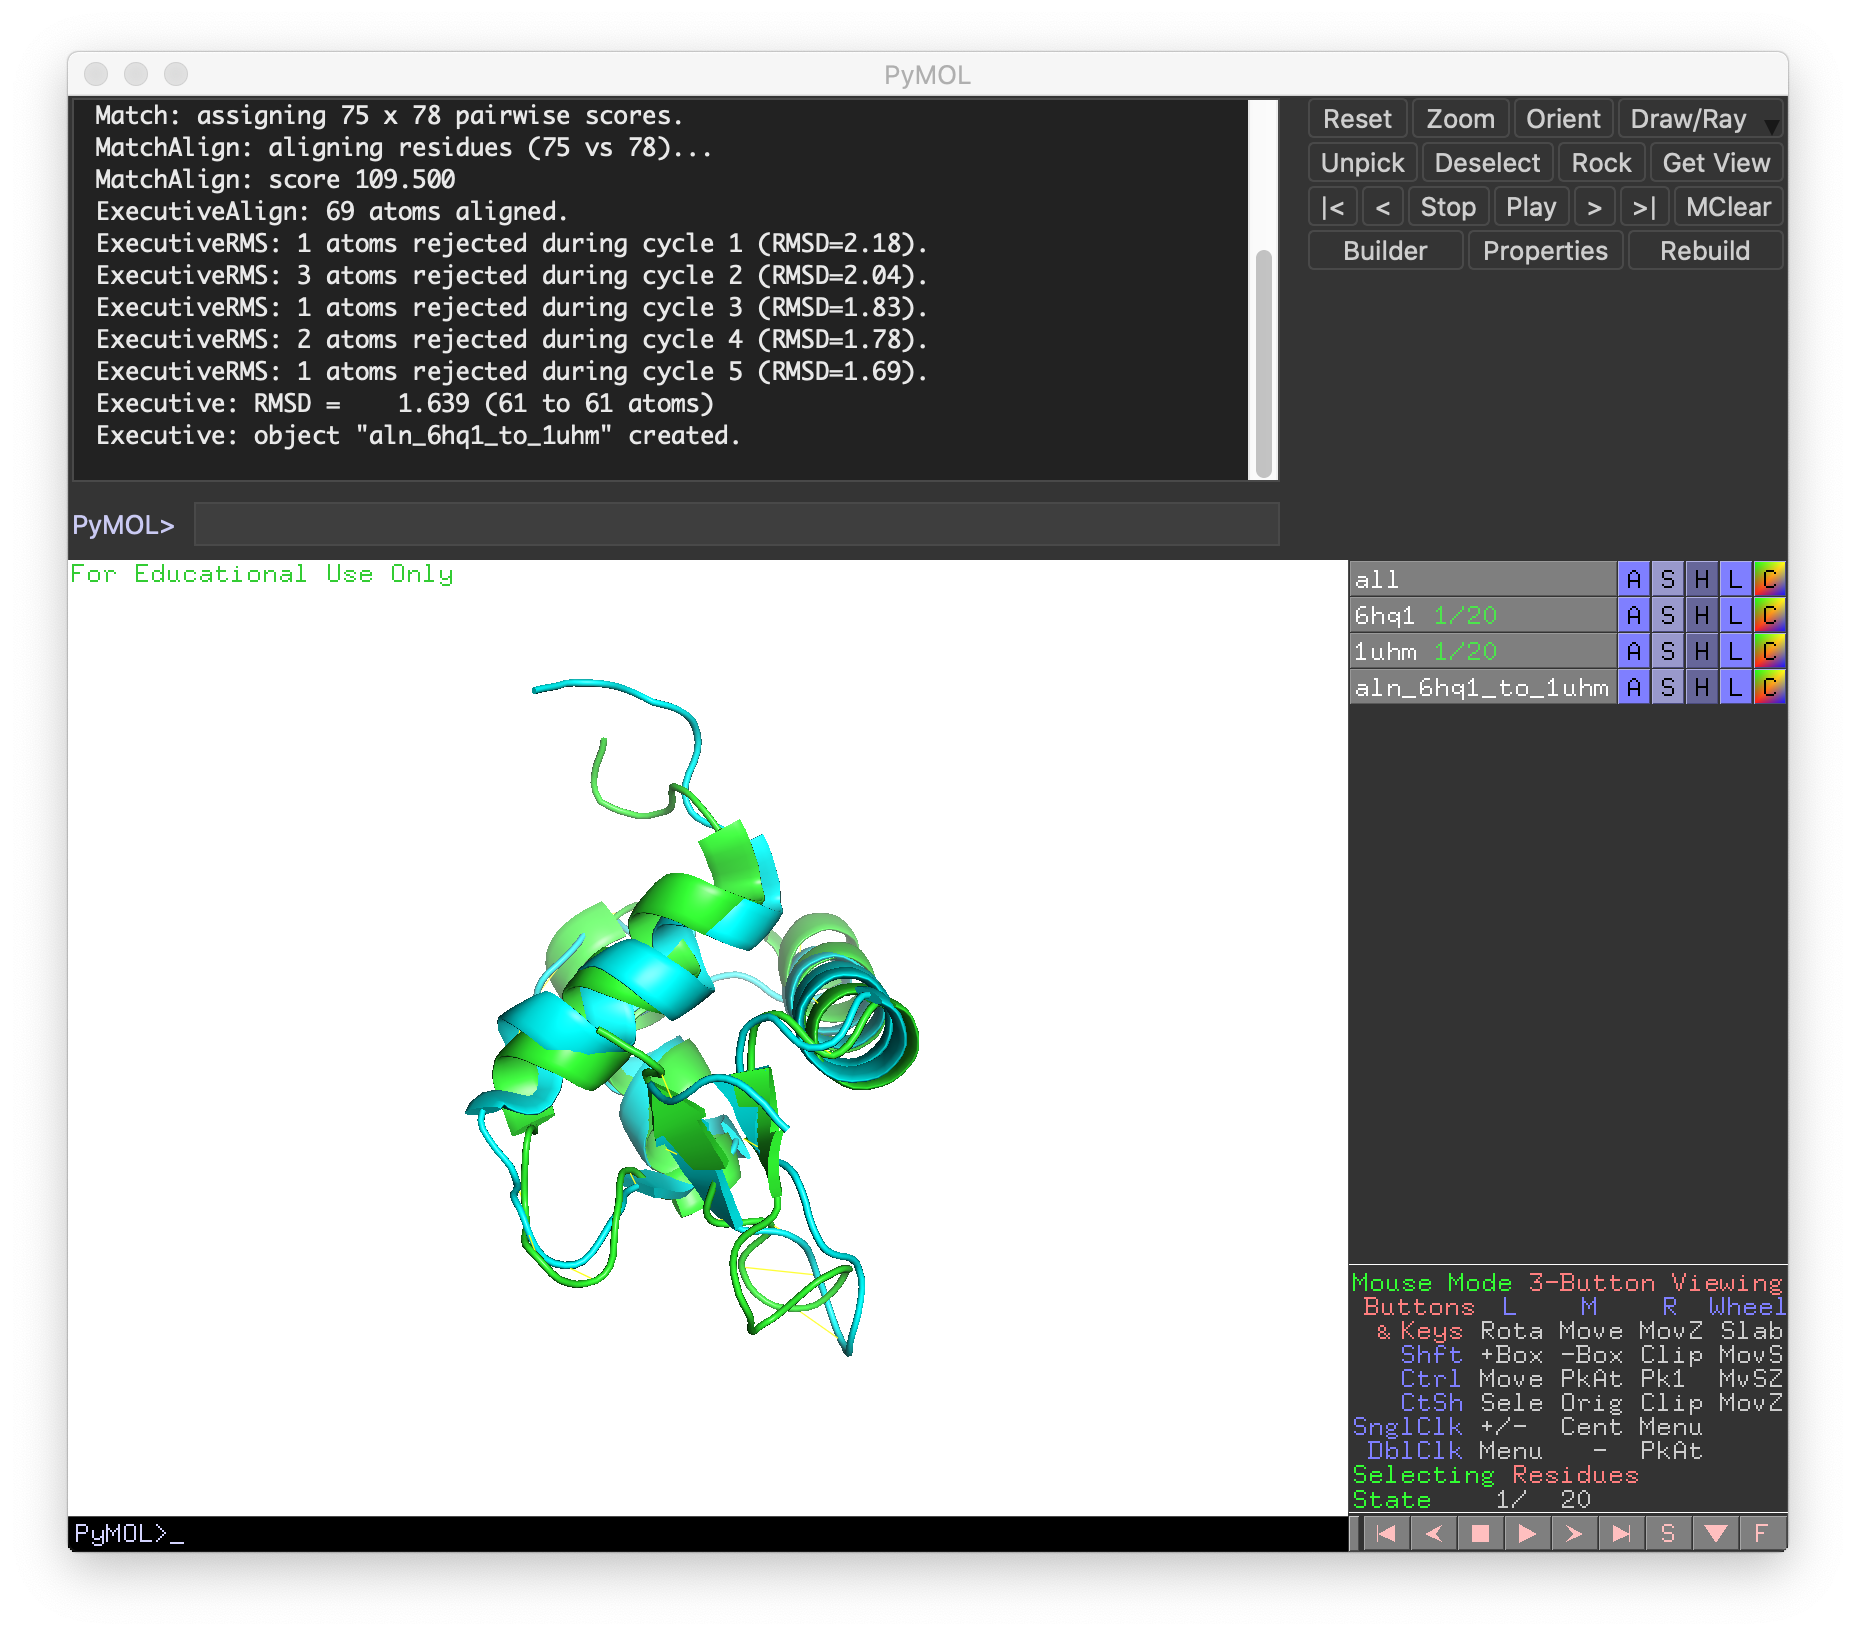

In [26]:
from IPython.display import Image

print("Alignement de la séquence 6HQ1 sur 1UHM.")
print("Image réalisé sur Pymol, le RMSD vaut 1.639 Angström.")
Image(filename = 'data/6HQ1_1UHM.png')

.

In [27]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
end_time = time.monotonic()
print("Le temps d'exécution du programme Python est de ", timedelta(seconds = end_time - start_time))
########### ~~~~~~~~~~~~~~~~~~~~~###########

Le temps d'exécution du programme Python est de  0:03:48.542849


.

## Tester la limite

In [28]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
start_time = time.monotonic()
########### ~~~~~~~~~~~~~~~~~~~~~###########

In [32]:
prot_id, prot_file = "6pnj", "data/6pnj.pdb"
boundary = PDBParser().get_structure(prot_id, prot_file)

In [33]:
p_cartoon = py3Dmol.view(query = 'pdb:6pnj')
p_cartoon.setStyle({'cartoon': {'color':'spectrum'}})
p_cartoon.show() 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Au bout de 30 min... toujours pas de résultats...

In [34]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
end_time = time.monotonic()
timedelta(seconds = end_time - start_time)
print("Le temps d'exécution du 'test limite' en Python est supérieur à 30 minutes.")
########### ~~~~~~~~~~~~~~~~~~~~~###########

Le temps d'exécution du 'test limite' en Python est supérieur à 30 minutes.
